In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 25
X = np.reshape(np.linspace(0, 0.9, N), (N,1))
Y = np.cos(10*X**2) + 0.1* np.sin(100*X)


In [3]:

def getPhi(feature, order):
    phi = np.zeros((feature.shape[0], order + 1))
    for i in range(feature.shape[0]):
        for j in range(0, order + 1):
            phi[i][j] = np.power(feature[i], j)
    return phi

In [29]:
def lml(alpha, beta, Phi, Y):
    conv = alpha* np.dot(Phi, np.transpose(Phi)) + beta * np.identity(Phi.shape[0])
    t1 = (2 * np.pi)**(-Phi.shape[0]/2.0)* np.linalg.det(conv) **(-0.5)
    t2 = np.exp((-0.5)*(np.dot(np.dot(np.transpose(Y), np.linalg.inv(conv)), Y)))
    log_ml = np.log(t1 * t2)
    return log_ml[0][0]
print(lml(0.1, 0.1, Phi, Y))

-52.33140257393549


In [30]:
def grad_lml(alpha, beta, Phi, Y):
    conv = alpha * np.dot(Phi, np.transpose(Phi)) + beta * np.identity(Phi.shape[0])

    t1 = -0.5 * np.trace(np.dot(np.linalg.inv(conv), np.dot(Phi, np.transpose(Phi))))
    t2 = -np.dot(np.dot(np.linalg.inv(conv), np.dot(Phi, np.transpose(Phi))), np.linalg.inv(conv))
    t3 = -0.5 * np.dot(np.dot(np.transpose(Y), t2), Y)
    lml_alpha = t1 +t3
    t4 = -0.5 * np.trace(np.linalg.inv(conv))
    t5 = -np.dot(np.linalg.inv(conv), np.linalg.inv(conv))
    t6 = -0.5 * np.dot(np.dot(np.transpose(Y), t5), Y)
    lml_beta = t4 + t6
    return np.array([lml_alpha, lml_beta])
print(grad_lml(0.1, 0.1, Phi, Y))

[[[ 26.57558498]]

 [[408.00548318]]]


In [6]:
def lml_gradient_descent(start_point, Phi, Y, iteration, step_size):
    alpha_array = np.zeros((iteration,))
    beta_array = np.zeros((iteration,))
    for i in range(0, iteration):
        alpha_array[i] = start_point[0][0]
        beta_array[i] = start_point[1][0]
        start_point = start_point + step_size * grad_lml(start_point[0][0], start_point[1][0], Phi, Y)
    return alpha_array, beta_array

In [7]:
Phi = getPhi(X, 1)
iteration = 200
step_size = 0.01
start_point = np.array([[0.5], [0.5]])


In [28]:
alpha_array, beta_array  = lml_gradient_descent(start_point, Phi, Y, iteration, step_size)
print(alpha_array[iteration-1])

0.42779213037952624


In [19]:
def plot_contour(delta, xrange1, xrange2, yrange1, yrange2):
    x_axis = np.arange(xrange1, xrange2, delta)
    y_axis = np.arange(yrange1, yrange2, delta)
    X_points, Y_points = np.meshgrid(x_axis, y_axis)
    Z = np.zeros(X_points.shape)
    print(Z.shape)
    for x1 in range(0, Z.shape[1]):
        for y1 in range(0, Z.shape[0]):
            z = lml(x_axis[x1], y_axis[y1], Phi, Y)
            Z[y1][x1] = z
    return X_points, Y_points, Z

(20, 20)


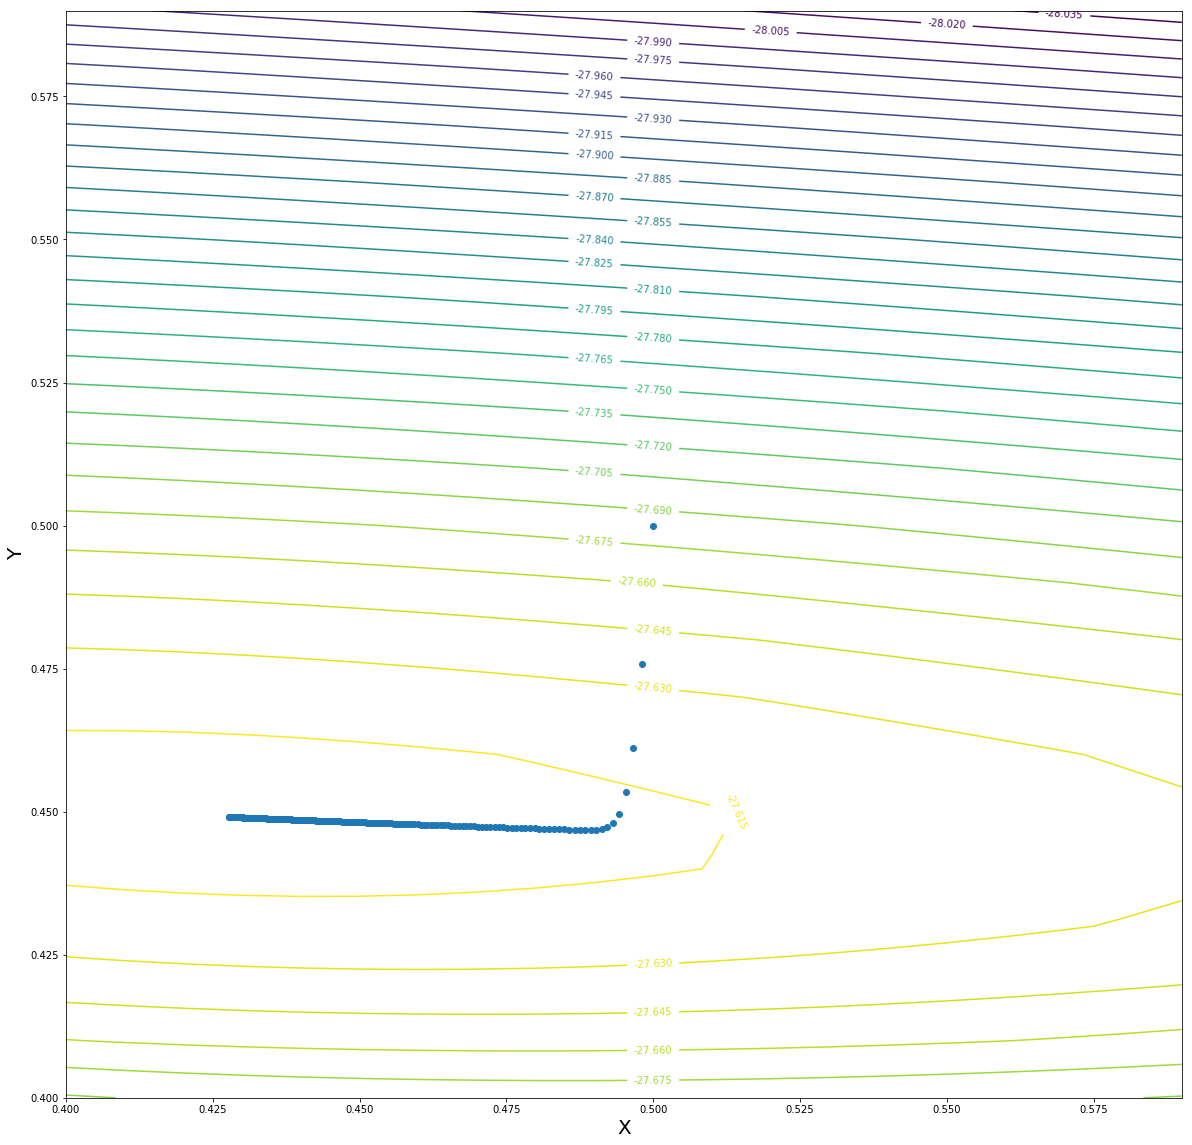

In [24]:
fig = plt.figure(1, figsize=(20,20))
X_points, Y_points, Z = plot_contour(0.01, 0.4, 0.6, 0.4, 0.6)
CS = plt.contour(X_points, Y_points, Z, 30)
plt.clabel(CS, inline=True, fontsize=10)
plt.xlabel('X', fontsize=20)
plt.ylabel('Y', fontsize=20)
x_points, y_points = lml_gradient_descent(start_point, Phi, Y, iteration, step_size)
plt.scatter(x_points, y_points)

In [25]:
def getPhi2(feature, order):
    phi = np.ones((feature.shape[0], 2*order+1))
    for i in range(feature.shape[0]):
        for j in range(1, order+1):
            a = 2 * np.pi * j * feature[i]
            phi[i][2*j -1] = np.sin(a)
            phi[i][2*j] = np.cos(a)
    return phi


In [33]:
value = np.zeros((1, 12))
iteration = 600
step_size = 0.0001
start_point = np.array([[0.5], [0.5]])
for order in range(12):
    Phi = getPhi2(X, order)
    alpha_array, beta_array  = lml_gradient_descent(start_point, Phi, Y, iteration, step_size)
    value[0][order] = lml(alpha_array[iteration-1], beta_array[iteration-1], Phi, Y)
print(value)

[[-28.27194655 -18.42666529 -14.45588147  -9.40780616  -6.92848573
   -7.20679094 -10.76710066 -12.46139391 -15.76257177 -19.10983338
  -21.26188673 -25.76319026]]


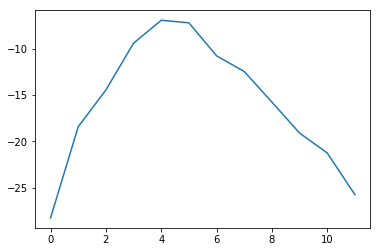

In [36]:
order = np.arange(0,12)
plt.plot(order, value[0])